##### GLDADec (Our Proposed) deconvolution on GSE107572
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE107572.
- 9 samples derived from human PBMC/PMN cells.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE107572/GSE107572_expression.csv',index_col=0)
domain_dic = pd.read_pickle(BASE_DIR+'/data/marker/human_blood_domain.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE107572/facs.csv',index_col=0)/100

***
#### Process marker information

In [3]:
# B cells
bcandi = []
bcandi.extend(domain_dic.get('B cells memory'))
bcandi.extend(domain_dic.get('B cells naive'))

# CD4 cells
cd4candi = []
cd4candi.extend(domain_dic.get('T cells CD4 memory'))
cd4candi.extend(domain_dic.get('T cells CD4 naive'))

# CD8 cels
cd8candi = domain_dic.get('T cells CD8')

# NK cells
nkcandi = domain_dic.get('NK cells')

# Monocytes
moncandi = domain_dic.get('Monocytes')

# Neutrophils
neucandi = domain_dic.get('Neutrophils')

# Dendritic cells
dccandi = domain_dic.get('Dendritic cells')

# Treg
tregcandi = domain_dic.get('Treg')

# generate original marker dict
k = ['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg']
v = [bcandi,cd4candi,cd8candi,nkcandi,moncandi,neucandi,dccandi,tregcandi]
final_dic = dict(zip(k,v))

***
#### Conduct GLDADec
- We added 100 genes with large coefficients of variation between samples.
- The cell types to be evaluated are as follows:
    1. 'B'
    2. 'CD4 T'
    3. 'CD8 T'
    4. 'Monocytes'
    5. 'NK'
    6. 'Neutrophils'
    7. 'Treg'
    8. 'Dendritic cells'

  0%|          | 0/10 [00:00<?, ?it/s]

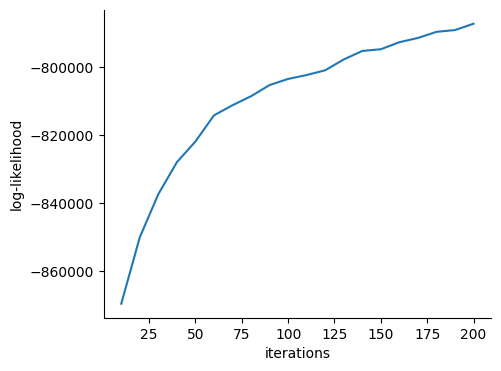

cells in res : ['B cells', 'T cells CD4', 'T cells CD8', 'NK cells', 'Monocytes', 'Neutrophils', 'Dendritic cells', 'Treg']
cells in ref : ['B', 'CD4T', 'CD8T', 'NK', 'Mon', 'Neu', 'myeloid dendritic cells', 'Treg']


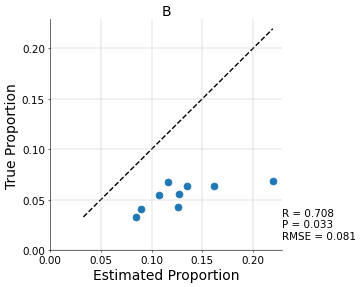

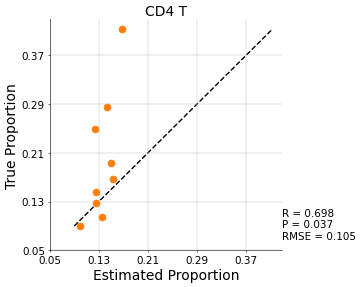

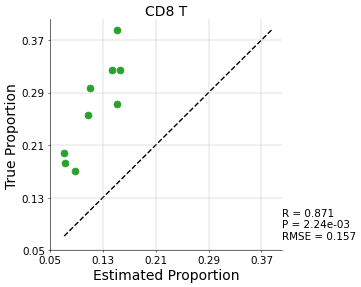

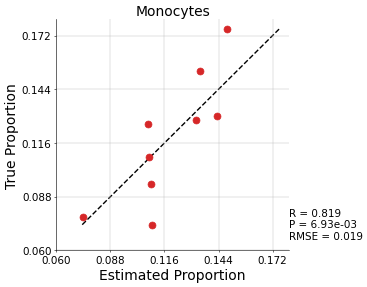

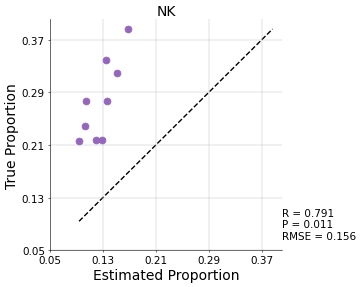

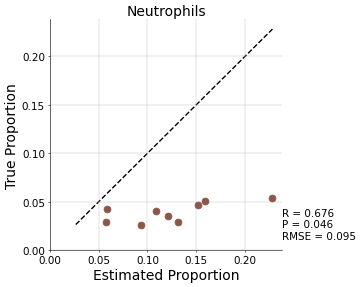

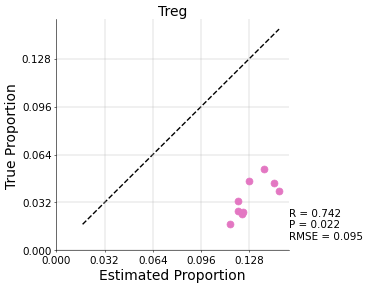

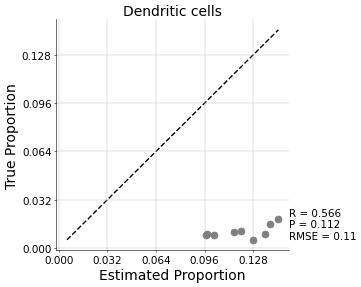

{'B': [('R', 0.7081), ('P', 0.033), ('RMSE', 0.0813)],
 'CD4 T': [('R', 0.6978), ('P', 0.037), ('RMSE', 0.1049)],
 'CD8 T': [('R', 0.8708), ('P', '2.24e-03'), ('RMSE', 0.157)],
 'Dendritic cells': [('R', 0.5659), ('P', 0.112), ('RMSE', 0.11)],
 'Monocytes': [('R', 0.8189), ('P', '6.93e-03'), ('RMSE', 0.0187)],
 'NK': [('R', 0.7914), ('P', 0.011), ('RMSE', 0.1559)],
 'Neutrophils': [('R', 0.6759), ('P', 0.046), ('RMSE', 0.0949)],
 'Treg': [('R', 0.7419), ('P', 0.022), ('RMSE', 0.0947)]}


In [4]:
# single run and eval
# conduct deconv
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=[],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=100)
pp.add_marker_genes(target_cells=['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg'],add_dic=final_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=200,minmax=False,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=200,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False)
res = pp.merge_total_res

pp.evaluate(facs_df=target_facs,deconv_norm_range=['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg'],
                facs_norm_range=['B','CD4T','CD8T','NK','Mon','Neu','myeloid dendritic cells','Treg'],
                res_names=[['B cells'],['T cells CD4'],['T cells CD8'],['NK cells'],['Monocytes'],['Neutrophils'],['Dendritic cells'],['Treg']],
                ref_names=[['B'],['CD4T'],['CD8T'],['NK'],['Mon'],['Neu'],['myeloid dendritic cells'],['Treg']],
                title_list = ['B','CD4 T','CD8 T','Monocytes','NK','Neutrophils','Treg','Dendritic cells'],
                dpi=50,multi=False)

In [5]:
res = pp.merge_total_res[0]
display(res)
#res.to_csv(BASE_DIR+'/baselines_eval/Proposed/Proposed_GSE107572_Results.csv')

,B cells,T cells CD4,T cells CD8,NK cells,Monocytes,Neutrophils,Dendritic cells,Treg
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 4,0.141016,0.131015,0.137682,0.131126,0.106568,0.103012,0.132237,0.117346
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 7,0.098057,0.132158,0.144597,0.147514,0.117359,0.152104,0.111483,0.096727
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 12,0.137375,0.158223,0.133447,0.134606,0.138332,0.054386,0.116326,0.127304
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 2,0.093861,0.152652,0.066830,0.105525,0.122705,0.214043,0.107810,0.136575
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 9,0.115257,0.129928,0.099055,0.141044,0.166517,0.123942,0.127408,0.096850
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 1,0.170202,0.175528,0.081513,0.108413,0.132379,0.087290,0.103945,0.140729
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 6,0.122063,0.142741,0.101682,0.108427,0.151634,0.143111,0.112206,0.118135
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 10,0.234990,0.153557,0.064203,0.069866,0.183983,0.052969,0.109213,0.131219
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 5,0.146796,0.104997,0.142916,0.107995,0.150441,0.114638,0.130570,0.101646
